와인 데이터 품질 분류 하기.

In [2]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()

X = wine['data']
feature_names = wine['feature_names']

y = wine['target']

df = pd.DataFrame(X, columns = feature_names)
df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


가져온 데이터를 살펴보자!

In [4]:
print(wine['target_names'])
print(y)
print(y.shape)

['class_0' 'class_1' 'class_2']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178,)


그래프를 이용해 직관적으로 알아보자.

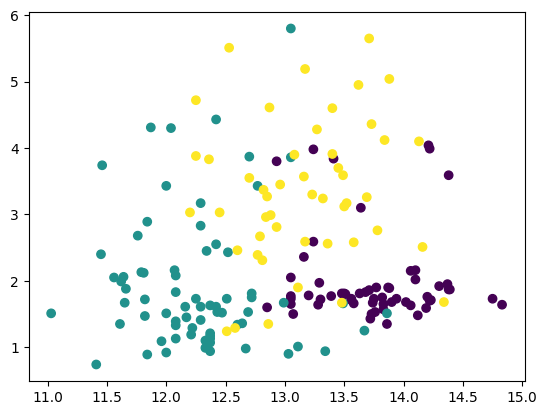

In [3]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(df['alcohol'],df['malic_acid'],c=y)

array([[<Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='malic_acid', ylabel='alcohol'>,
        <Axes: xlabel='ash', ylabel='alcohol'>,
        <Axes: xlabel='alcalinity_of_ash', ylabel='alcohol'>,
        <Axes: xlabel='magnesium', ylabel='alcohol'>,
        <Axes: xlabel='total_phenols', ylabel='alcohol'>,
        <Axes: xlabel='flavanoids', ylabel='alcohol'>,
        <Axes: xlabel='nonflavanoid_phenols', ylabel='alcohol'>,
        <Axes: xlabel='proanthocyanins', ylabel='alcohol'>,
        <Axes: xlabel='color_intensity', ylabel='alcohol'>,
        <Axes: xlabel='hue', ylabel='alcohol'>,
        <Axes: xlabel='od280/od315_of_diluted_wines', ylabel='alcohol'>,
        <Axes: xlabel='proline', ylabel='alcohol'>],
       [<Axes: xlabel='alcohol', ylabel='malic_acid'>,
        <Axes: xlabel='malic_acid', ylabel='malic_acid'>,
        <Axes: xlabel='ash', ylabel='malic_acid'>,
        <Axes: xlabel='alcalinity_of_ash', ylabel='malic_acid'>,
        <Axes: xlabel='magne

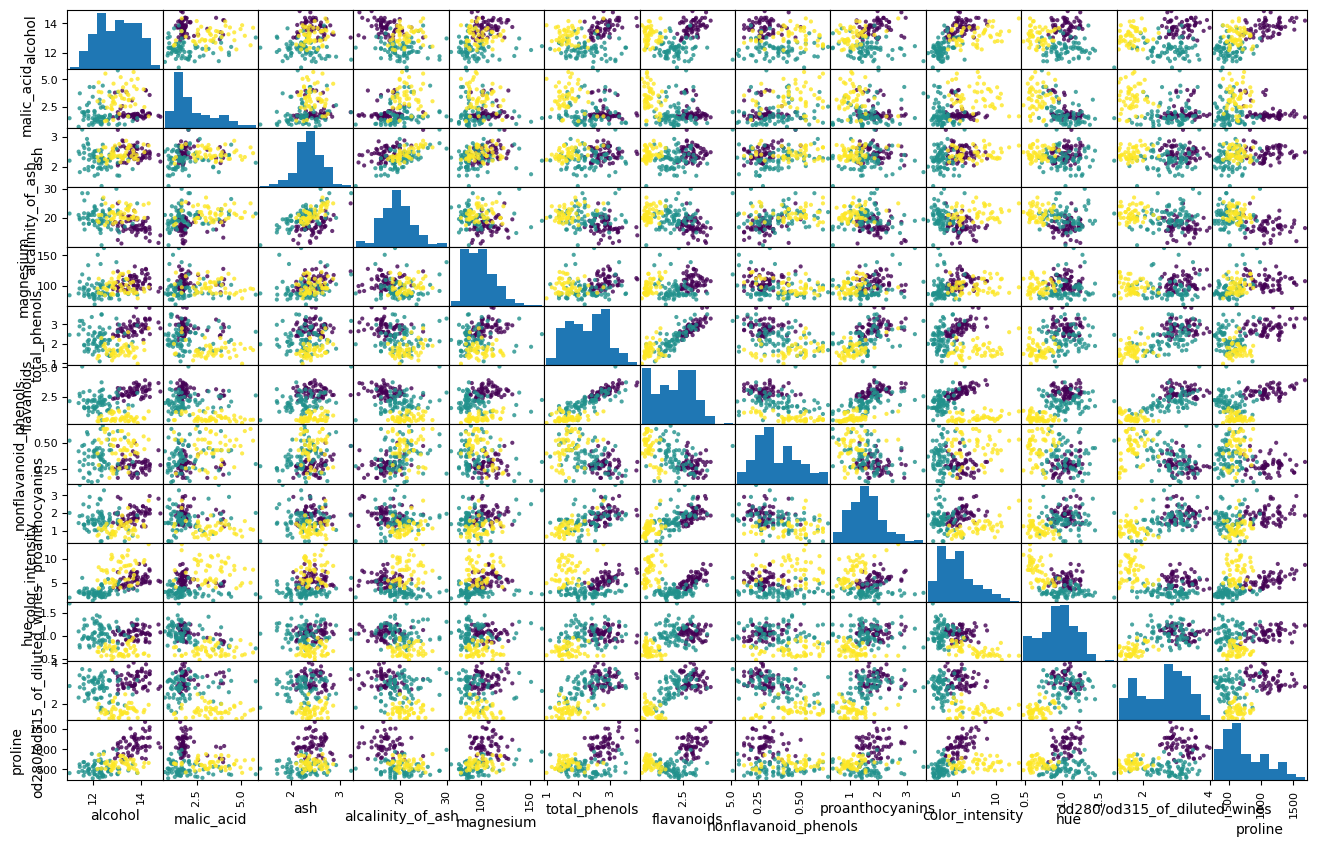

In [6]:
pd.plotting.scatter_matrix(df,c=y,figsize=(16,10),alpha=0.8)
#sns.pairplot으로도 그릴수 있음.

Train_test_Split
staratify : target 데이터(Y)의 분포 비율을 고려해서 적절히 train, test set 데이터를 만듭니다. 분류모델에서만 사용하는 것을 추천합니다.
random_state : '777'이라는 고정된 랜덤시드를 사용합니다. 데이터셋을 나눌 때마다 데이터셋이 서로 다르게 만들어지는 것을 막습니다. 모델학습, 실험을 여러번 진행할 때, 데이터셋으로 인한 랜덤요소를 제거하고 각 모델 간 성능을 비교할 수 있습니다.

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=777)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(133, 13) (45, 13)
(133,) (45,)


x의 칼럼별 기술통계랑(평균, 25%, 75% 분위수 , count etc)

In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


평균이 너무 다름 . -> 변수들끼리 비교 대상이 될 수 없음.

nonflavanoid_phenols의 평균은 0.3인데 proline의 평균은 746입니다. 칼럼마다 scale이 매우 다르다는 것인데, 이 경우 Y를 분류하는데에 미치는 영향 정도가 달라지게 됩니다. 보다 원활한 학습의 진행을 위해서는 정규화를 진행할 필요가 있습니다. 분야에 따라 서로 각기다른 정규화를 사용하기도 하고, 새로운 방식을 만들어내기도 합니다.

sklearn.preprocessing에서 제공하는 대표적인 정규화 scaler는 다음과 같습니다.

StandardScaler : (평균=0, 분산=1)이 되도록 조정합니다.
MinMaxScaler : 모든 값이 0~1 사이에 오도록(최대값=1, 최소값=0) 조정합니다.
RobustScaler : 최대, 최솟값 대신 사분위값(Q1, Q2, Q3)를 사용해 조정합니다. (이상값에 덜 민감함)
여기서는 MinMaxScaler를 사용하겠습니다.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train) 
#X_scaled_train = scaler.fit_transform(X_train) 와 차이가 없음.

pd.DataFrame(X_scaled_train).describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.512268,0.301847,0.568601,0.445129,0.329683,0.446098,0.483915,0.464478,0.378762,0.319472,0.386491,0.486188,0.378229
std,0.206279,0.238522,0.214119,0.170097,0.164545,0.213477,0.285922,0.251911,0.179163,0.194846,0.190692,0.257047,0.248423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.342105,0.134904,0.435897,0.335106,0.195652,0.262069,0.219941,0.265306,0.274448,0.168089,0.243902,0.238095,0.173061
50%,0.531579,0.190578,0.564103,0.420213,0.304348,0.431034,0.519062,0.408163,0.362776,0.283276,0.398374,0.553114,0.318367
75%,0.684211,0.468951,0.735043,0.547872,0.434783,0.627586,0.744868,0.632653,0.485804,0.424061,0.512195,0.695971,0.567347
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


X_train 데이터셋을 기준으로 scaler를 설정한 뒤, X_train 데이터를 정규화 한 데이터 X_scaled_train 데이터셋을 생성했습니다. 모든 칼럼에서 (max=1, min=0)이 되었습니다.
X_train에 적용하였다면, X_test에도 적용을 해야함.

In [12]:
X_scaled_test = scaler.transform(X_test)
pd.DataFrame(X_scaled_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.537251,0.256721,0.572840,0.429669,0.304348,0.475326,0.529293,0.418141,0.354083,0.330906,0.393135,0.507041,0.357442
std,0.235528,0.240762,0.289175,0.199885,0.123433,0.223575,0.313578,0.259776,0.185411,0.208333,0.172606,0.271164,0.283485
min,0.100000,-0.051392,-0.290598,-0.031915,0.086957,0.058621,0.046921,-0.020408,0.003155,0.057167,0.073171,0.007326,-0.009796
25%,0.352632,0.111349,0.435897,0.292553,0.206522,0.265517,0.258065,0.244898,0.201893,0.164676,0.252033,0.285714,0.142857
50%,0.531579,0.177730,0.564103,0.468085,0.282609,0.517241,0.548387,0.346939,0.324921,0.291809,0.373984,0.553114,0.258776
75%,0.736842,0.342612,0.700855,0.547872,0.380435,0.575862,0.686217,0.591837,0.495268,0.402730,0.520325,0.706960,0.567347
max,0.978947,1.032120,1.307692,0.920213,0.630435,0.868966,1.390029,1.061224,0.804416,0.893345,0.731707,0.934066,1.134694


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.9849624060150376

In [15]:
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test,y_test)

1.0

In [16]:
from sklearn.metrics import confusion_matrix
print('훈련 데이터셋 오차 행렬\n', confusion_matrix(y_train,pred_train),'\n')
print('테스트 데이터셋 오차 행렬\n', confusion_matrix(y_train,pred_train),'\n')

훈련 데이터셋 오차 행렬
 [[44  0  0]
 [ 1 51  1]
 [ 0  0 36]] 

테스트 데이터셋 오차 행렬
 [[44  0  0]
 [ 1 51  1]
 [ 0  0 36]] 



성능결과 확인.
precision(정밀도), F1-score, sklearn -> classification_report를 사용하면 손쉽게 한번에 확인할 수 있음.

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.96      0.98        53
           2       0.97      1.00      0.99        36

    accuracy                           0.98       133
   macro avg       0.98      0.99      0.99       133
weighted avg       0.99      0.98      0.98       133



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style = 'white') # white background style for seaborn plots
sns.set(style = 'whitegrid',color_codes=True)

import warnings
warnings.simplefilter(action='ignore')



df_titanic = sns.load_dataset('titanic')    # 타이타닉호 데이터



In [19]:
train_df  = pd.read_csv('C:/Users/405/Desktop/새 폴더 (2)/train.csv')
test_df = pd.read_csv('C:/Users/405/Desktop/새 폴더 (2)/test.csv')

In [20]:
print(len(train_df),len(test_df))

891 418


In [21]:
#결측치 확인
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
#결측치 비율
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/
                                                      train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


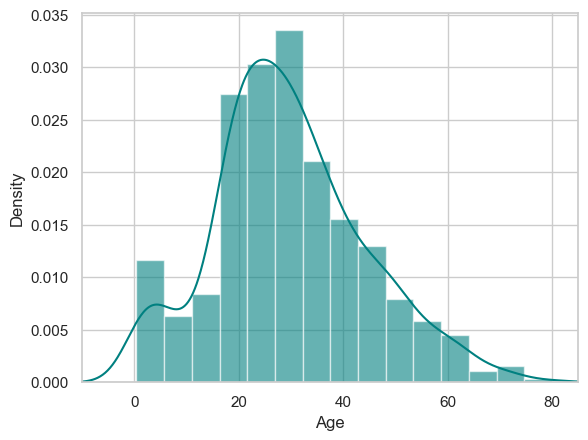

In [24]:
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, color='teal',alpha=0.6)
train_df['Age'].plot(kind = 'density',color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [25]:
#mean  /#skipna : 결측치를 무시할지 여부
print('The mean of "Age" is %.2f' %(train_df['Age'].mean(skipna=True)))
#median
print('The median of "Age" is %.2f' %(train_df['Age'].median(skipna=True)))
#mode
print('The mode of "Age" is %.2f' %(train_df['Age'].mode()))

The mean of "Age" is 29.70
The median of "Age" is 28.00
The mode of "Age" is 24.00


In [26]:
print('Percent of missing "Embared" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/
                                                      train_df.shape[0])*100))

Percent of missing "Embared" records is 0.22%


In [27]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/
                                                      train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


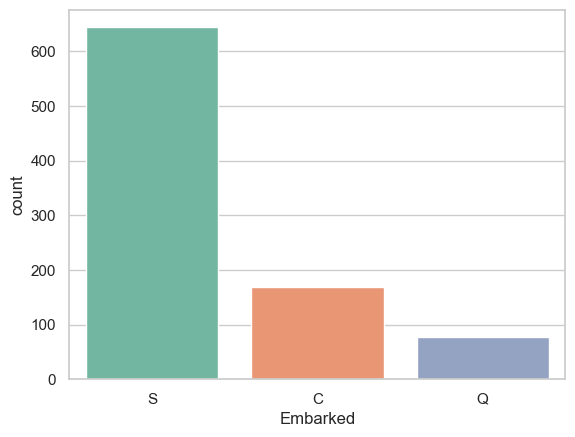

In [28]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x= 'Embarked', data = train_df, palette='Set2')
plt.show()

#Embarked는 S에서 탑승이 많이 됨.

In [29]:
#결측치 처리 / ags는 median / Embarked는 가장 많은 것으로 채워넣음.
#cabin은 drop
train_data = train_df.copy() 
train_data['Age'].fillna(train_data['Age'].median(skipna=True), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin',axis=1,inplace=True)

In [30]:
#결측치 처리 후 화인
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

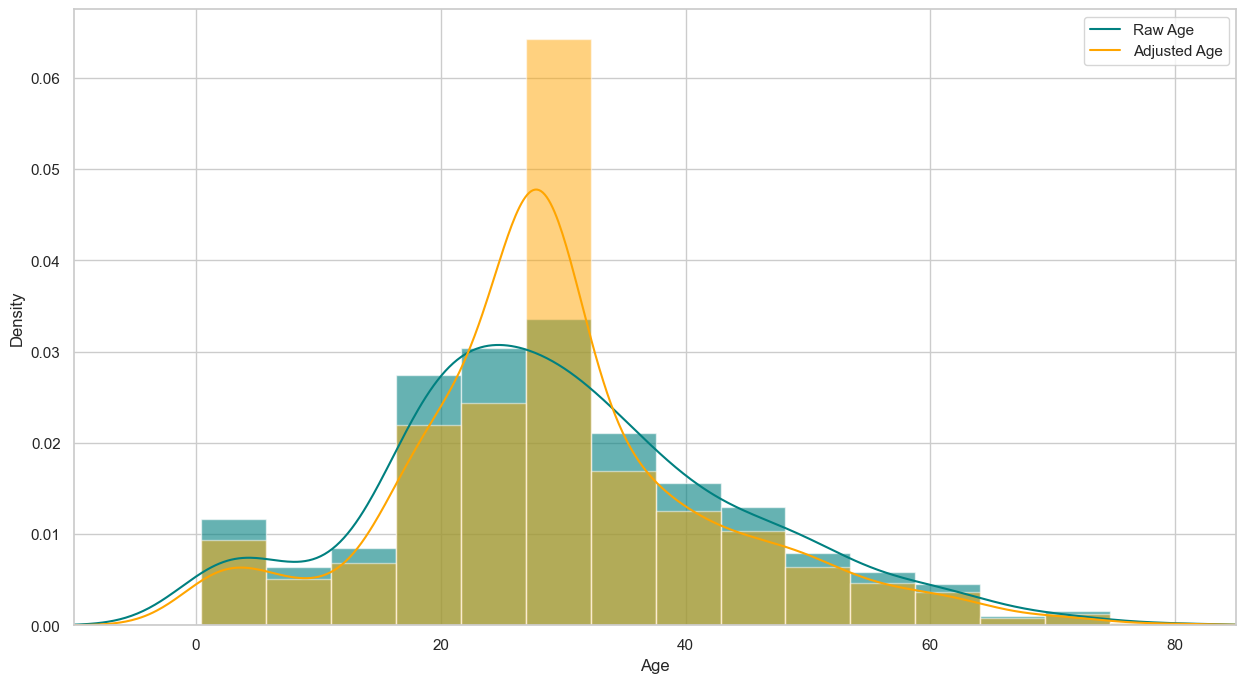

In [31]:
#결측치 처리 전과 처리 후의 figure
plt.figure(figsize=(15,8))
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, color='teal',alpha=0.6)
train_df["Age"].plot(kind = 'density',color='teal')
ax = train_data['Age'].hist(bins=15, density=True, stacked=True, color='orange',alpha=0.5)
train_data["Age"].plot(kind = 'density',color='orange')
ax.legend(['Raw Age','Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

파생변수
새로운 변수 생성

In [32]:
train_data['TravelAlone'] = np.where((train_data['SibSp']+train_data['Parch'])>0,0,1)
train_data.drop('SibSp',axis=1,inplace=True)
train_data.drop('Parch',axis=1,inplace=True)

In [35]:
#원핫 인코딩
training = pd.get_dummies(train_data, columns = ['Pclass','Embarked','Sex'])
training.drop('PassengerId',axis=1,inplace=True)
training.drop('Name',axis=1,inplace=True)
training.drop('Ticket',axis=1,inplace=True)

final_train = training
training.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,False,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,True,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,False,True


test에도 똑같이 적용.

In [36]:
#결측치 처리 / ags는 median / Embarked는 가장 많은 것으로 채워넣음.
#cabin은 drop
test_data = test_df.copy() 
test_data['Age'].fillna(train_data['Age'].median(skipna=True), inplace=True)
test_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

test_data['TravelAlone'] = np.where((test_data['SibSp']+test_data['Parch'])>0,0,1)
test_data.drop('SibSp',axis=1,inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

#원핫 인코딩
testing = pd.get_dummies(test_data, columns = ['Pclass','Embarked','Sex'])
testing.drop('PassengerId',axis=1,inplace=True)
testing.drop('Name',axis=1,inplace=True)
testing.drop('Ticket',axis=1,inplace=True)

final_train = testing
testing.head()
